In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

r = pd.read_csv( 'ratings.csv')
tr = pd.read_csv( 'to_read.csv' )
b = pd.read_csv( 'books.csv' )

t = pd.read_csv( 'tags.csv' )
bt = pd.read_csv( 'book_tags.csv')


# Average Ratings

Question 1: How many people given ratings?

In [65]:
# Since every user have unique id, so we can calculate the unique user_id's from the dataframe and the unique user_id's are the number 
# of total people gives rating.
len(r.user_id.unique())

53424

Hypothesis:	If we randomly choose a book, the probability that a book has an average rating of 4 is greater than the probability book whose average rating is 3.

In [66]:
# calculate the total number of unique books
Total_books = len(b.book_id.unique())

# count the number of books with average rating 4 and 3
books_avg_rating_4 = len(b[b["average_rating"] == 4.0])
books_avg_rating_3 = len(b[b["average_rating"] == 3.0])

# calculate the probabilities of selecting a book with average rating 4 and 3
probability_of_avg_rating_4 = books_avg_rating_4 / Total_books
probability_of_avg_rating_3 = books_avg_rating_3 / Total_books

# compare the probabilities and print the results
if probability_of_avg_rating_4 > probability_of_avg_rating_3:
    print("The probability of selecting a book with an average rating of 4 is greater than the probability of selecting a book with an average rating of 3.")
else:
    print("The probability of selecting a book with an average rating of 3 is greater than or equal to the probability of selecting a book with an average rating of 4.")
    print("Hypothesis is True")


The probability of selecting a book with an average rating of 4 is greater than the probability of selecting a book with an average rating of 3.


Que 2: Find the probability of getting a book whose average_rating is greater then 4?

Question 3: rating plot?

# to_read

In [67]:
print(len(tr))
tr

912705


,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380
...,...,...
912700,39374,1049
912701,10492,5180
912702,21879,4827
912703,21879,6642


Question 3: Find those 10 books, which most of the people wants to read? 

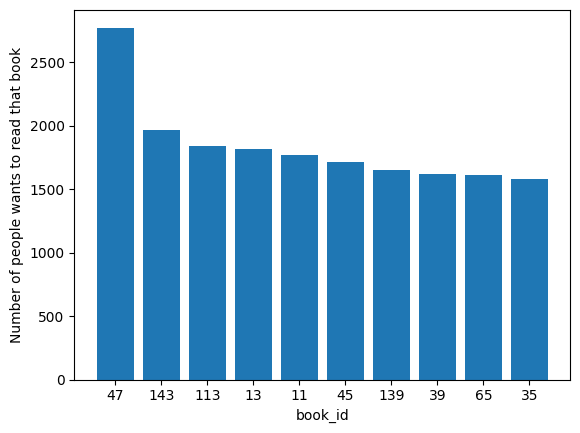

In [68]:

h = ((tr["book_id"]).value_counts()).nlargest(10).to_frame()
X = list(map(str, h.index))

Y = []
for i in h.index:
    Y.append(h["book_id"][i])

plt.bar(X, Y)
plt.xlabel("book_id")
plt.ylabel("Number of people wants to read that book")

plt.show()

So by looking the above plot we can check that how many people wants to read the most common books.

Question 3(a): And how many people wants to read the most common book, which is number of occurances of the book_id of the most occured book in the book_id column ?

In [69]:
print(h["book_id"][47], "people wants to read the book with book_id", h.idxmax()[0])

2772 people wants to read the book with book_id 47


# Books

In [70]:
b.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


Que 4: Plot Bar graph of top 5 authors?


<BarContainer object of 5 artists>

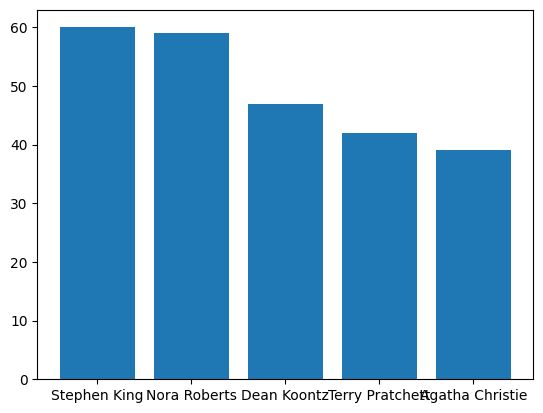

In [71]:
author_occurances = b["authors"].value_counts().nlargest(5)
df = pd.DataFrame(author_occurances)
df.index
occ = []

for i in range(len(df["authors"])):
    occ.append((df["authors"][i]))
occ
plt.bar(df.index,  occ)


Que 5: The user wants to search books by the author name? Printonly the data of those books whose author name is entered by the user?


In [72]:
Available_books_data = pd.DataFrame(columns=b.columns)

author_name = input("Enter author name: ").lower()

found_author = False
for index, row in b.iterrows():
    if author_name == row['authors'].lower():
        Available_books_data = pd.concat([Available_books_data, row.to_frame().transpose()], ignore_index=True)
        found_author = True

if not found_author:
    print("This author's books is  not available.")
else:
    Available_books_data.to_csv('my_data.csv', index=False)
    
Available_books_data

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,342,13497818,13497818,19926990,139,316228532,9780316228530.0,J.K. Rowling,2012.0,The Casual Vacancy,...,231835,254461,28751,24583,38326,74611,75741,41200,https://images.gr-assets.com/books/1358266832m...,https://images.gr-assets.com/books/1358266832s...
1,399,3950967,3950967,3007490,131,747599874,9780747599880.0,J.K. Rowling,2007.0,The Tales of Beedle the Bard,...,284833,319107,11330,3019,15025,69367,103350,128346,https://images.gr-assets.com/books/1373467575m...,https://images.gr-assets.com/books/1373467575s...
2,422,862041,862041,2962492,76,545044251,9780545044260.0,J.K. Rowling,1998.0,Complete Harry Potter Boxed Set,...,190050,204125,6508,1105,1285,7020,30666,164049,https://images.gr-assets.com/books/1392579059m...,https://images.gr-assets.com/books/1392579059s...
3,3753,10,10,21457570,6,439827604,9780439827610.0,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)",...,24618,26274,882,203,186,946,3891,21048,https://images.gr-assets.com/books/1328867351m...,https://images.gr-assets.com/books/1328867351s...
4,4641,30065028,29363501,50435175,49,NaN,NaN,J.K. Rowling,2016.0,Fantastic Beasts and Where to Find Them: The O...,...,18290,42210,4692,323,721,4257,13024,23885,https://images.gr-assets.com/books/1476913365m...,https://images.gr-assets.com/books/1476913365s...
5,6141,1317181,1317181,19079807,8,185549664X,9781855496640.0,J.K. Rowling,2003.0,NaN,...,16249,16350,272,114,199,1182,3744,11111,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
6,7523,31538647,31538647,52218770,18,NaN,NaN,J.K. Rowling,2016.0,Hogwarts: An Incomplete and Unreliable Guide,...,14977,15844,1339,63,346,2806,5543,7086,https://images.gr-assets.com/books/1502156557m...,https://images.gr-assets.com/books/1502156557s...
7,9048,2002,2002,8621948,5,043932162X,9780439321620.0,J.K. Rowling,2001.0,NaN,...,10736,11732,185,106,304,1548,2595,7179,https://images.gr-assets.com/books/1479775271m...,https://images.gr-assets.com/books/1479775271s...


Que 4: Trends of how many books published in a year after 2000?

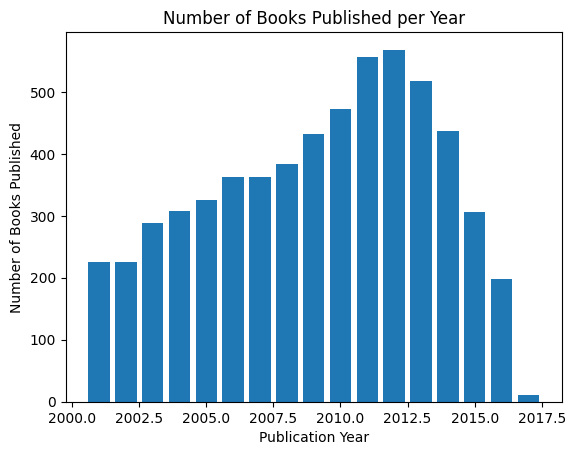

In [73]:

x = b[b['original_publication_year'] > 2000]

# group books by publication year and count the number of books published
grouped_df = x.groupby('original_publication_year').size().reset_index(name='count')

plt.bar(grouped_df['original_publication_year'], grouped_df['count'])
plt.title('Number of Books Published per Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Books Published')
plt.show()


How does the publication year of books relate to their average rating or number of ratings, and could this be used to inform decisions about when to release new books?

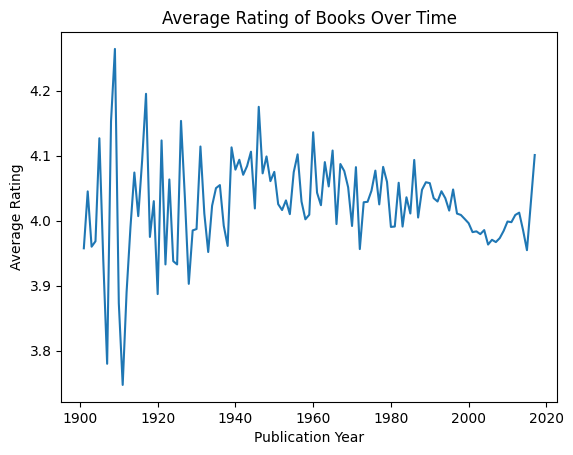

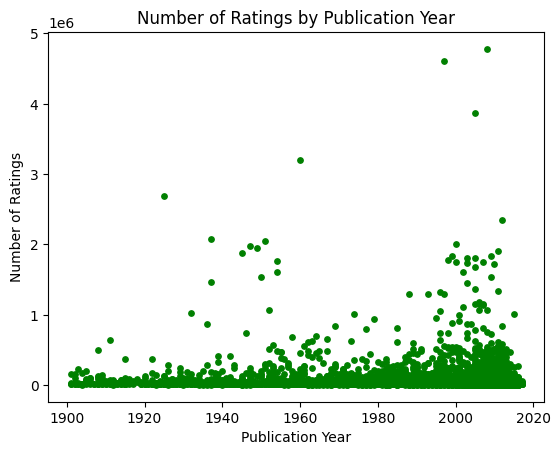

In [74]:

# let say we only want to include books which was published after 1900
b = b[b["original_publication_year"] > 1900]

# calculate the average rating for each publication year

avg_ratings = b.groupby("original_publication_year")["average_rating"].mean()

plt.plot(avg_ratings.index, avg_ratings.values)
plt.xlabel("Publication Year")
plt.ylabel("Average Rating")
plt.title("Average Rating of Books Over Time")
plt.show()

plt.scatter(b["original_publication_year"], b["ratings_count"], s = 15, c = "g")
plt.xlabel("Publication Year")
plt.ylabel("Number of Ratings")
plt.title("Number of Ratings by Publication Year")
plt.show()


In [75]:
len(r)

5976479